<a href="https://colab.research.google.com/github/KumudaBG/DeepLearning-Assignment3/blob/main/b3_pytorch_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Fundamentals - Part 1

## Colab environment

In [ ]:
!python --version

Python 3.7.10


In [ ]:
!pip list | grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.28.0        
tensorflow-probability        0.12.1        


In [ ]:
!pip list | grep torch

torch                         1.8.0+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.0         
torchvision                   0.9.0+cu101   


In [ ]:
!nvidia-smi

# It's okay to run this notebook without a GPU!

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



### 3-dimensional inputs , 2-D output

In [ ]:
import torch
import torch.nn as nn

n = 270
d = 3
x = torch.FloatTensor(n, d).uniform_(-1, 1)
weights_true = torch.tensor([[5,1,2],[2,2,1]]).float()
weights_true = torch.transpose(weights_true,0,1)
bias_true= torch.tensor([2,1])
y_true = (x ** 2) @ weights_true+ x @ weights_true + bias_true.T
print(f'y: {y_true.shape}')
print(y_true)

#Visualization

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from sklearn.manifold import TSNE
def plot_3d(title, X, y, y_pred=None):
  X_tnse = TSNE(n_components=2, random_state=123).fit_transform(X)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(X_tnse[:,0], X_tnse[:,1], y, label='y_true')
  ax.set_title(title)
  if y_pred is not None:
    ax.scatter(X_tnse[:,0], X_tnse[:,1], y_pred, label='y_pred', marker='v')
  plt.legend()
  plt.show()

In [ ]:
import plotly.graph_objects as pltgo
def plot_go_3d(x, y, y_pred=None):
  
  fig = pltgo.Figure()
  fig.add_trace(pltgo.Scatter3d(x = x[:,0], y = x[:,1], z = y.reshape([-1]),
                    name='y_true', mode='markers', marker=dict( size=10, color='dodgerblue', colorscale='Viridis', opacity=0.5)))
  if y_pred is not None:
    fig.add_trace(pltgo.Scatter3d(x = x[:,0], y = x[:,1], z = y_pred.reshape([-1]),
                   name='y_pred', mode='markers', marker=dict( size=10, color='goldenrod', colorscale='Viridis', opacity=0.5)))
  fig.update_layout(margin=dict(r=20, b=10, l=10, t=10))
  fig.show()

In [ ]:
X = TSNE(n_components=2).fit_transform(x)
Y = TSNE(n_components=1).fit_transform(y_true)
plot_go_3d(X,Y)

#Model

Using Inbuilt linear layer, Loss and ReLU activation function

In [ ]:
class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu1 = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 8)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(8, 2)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3
  

In [ ]:
# Now we run the training loop
from typing import Callable

def torch_fit(x, y, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad() 
    y_pred = model(x) 
    loss_value = loss(y_pred, y)
    if epoch % 50 == 0:
      print(f'Epoch {epoch}, loss {loss_value}')
    loss_value.backward() 
    optimizer.step() 

loss = nn.MSELoss()
model = TorchModel(d, 10)
torch_fit(x, y_true, model=model, loss=loss, lr=0.035, num_epochs=1000)

Epoch 0, loss 22.457727432250977
Epoch 50, loss 5.89201545715332
Epoch 100, loss 1.0242890119552612
Epoch 150, loss 0.5259260535240173
Epoch 200, loss 0.3738264739513397
Epoch 250, loss 0.29270926117897034
Epoch 300, loss 0.2206481546163559
Epoch 350, loss 0.17754964530467987
Epoch 400, loss 0.15091469883918762
Epoch 450, loss 0.13078290224075317
Epoch 500, loss 0.11502478271722794
Epoch 550, loss 0.1024320125579834
Epoch 600, loss 0.09222369641065598
Epoch 650, loss 0.0840964987874031
Epoch 700, loss 0.07732601463794708
Epoch 750, loss 0.0719173327088356
Epoch 800, loss 0.06826692819595337
Epoch 850, loss 0.06549736857414246
Epoch 900, loss 0.0634913295507431
Epoch 950, loss 0.06272871047258377


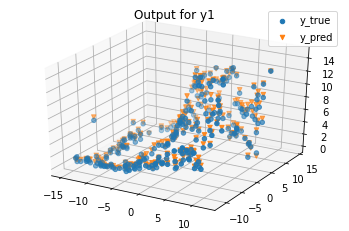

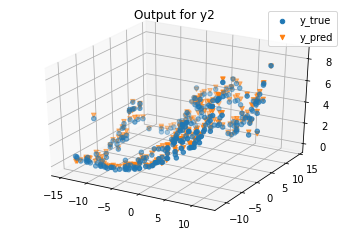

In [ ]:
y_pred=model(x).detach().numpy()
plot_3d('Output for y1', x, y_true[:,0], y_pred[:,0])
plot_3d('Output for y2', x, y_true[:,1], y_pred[:,1])

In [ ]:
X_plot = TSNE(n_components=2).fit_transform(x)
y_true_plot = TSNE(n_components=1).fit_transform(y_true)
y_pred_plot = TSNE(n_components=1).fit_transform(y_pred)
plot_go_3d(X_plot,y_true_plot,y_pred_plot)